In [49]:
# -*- coding: utf-8 -*-
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import codecs
import re
from bs4 import BeautifulSoup # $ pip install beautifulsoup4
%matplotlib inline

In [2]:
#Search through the dataset directory to get all of the file directory.
mypath = './papers/'
from os import walk
files = []
fileName = []
d = [mypath]
for (dirpath, dirnames, filenames) in walk(mypath):
    if(dirpath)!='./': dirpath+="/"
    files.extend([dirpath+s for s in filenames])
    fileName.extend([s for s in filenames])

In [3]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

#Convert Example
#content = convert_pdf_to_txt('papers/Virach Sornlertlamvanich/c7a39b0ff3790651b2297f90f6b0c5bbb632.pdf')

In [4]:
def read_all_pdf(files):
    contents = []
    professor_names = []
    direc = []
    error_counts = 0
    success_counts = 0
    start = timeit.default_timer()
    for file in files:
        professor_name = file.split("/")[2]
        try:
            content = convert_pdf_to_txt(file)
            contents.append(content)
            professor_names.append(professor_name)
            direc.append(file)
            success_counts+=1
        except Exception:
            print("error reading "+file+". Moving on..")
            error_counts+=1
    stop = timeit.default_timer()
    print("Execution time : "+str(round(stop - start,2))+"s.")    
    
    papers_df = pd.DataFrame({'name':professor_names,'content':contents,'directory':direc},columns=['name','content','directory'])
    return papers_df

In [6]:
paper_df = read_all_pdf(files)
paper_df['dir'] = files
paper_df.to_csv('paper_content.csv',index=False ,encoding="utf-8")

error reading ./papers/Banlue Srisuchinwong/04292722.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/05491571.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/10PAGE72_PAGE77.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/A_Current-Tunable_Sinusoidal_Oscillator20160618-7206-1u9t0df.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/Chaos_in_a_Fractional-Order_Jerk_Model_U20160618-20323-12a6a8s.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/IEICE_Off_Print.pdf. Moving on..
error reading ./papers/Banlue Srisuchinwong/JAPEDv1n3-4p273-279Khan.pdf. Moving on..
error reading ./papers/Boontawee Suntisrivaraporn/10.1.1.129.8007.pdf. Moving on..
error reading ./papers/Boontawee Suntisrivaraporn/7938. Moving on..
error reading ./papers/Boontawee Suntisrivaraporn/Boontawee Suntisrivaraporn_6511AB.pdf. Moving on..
error reading ./papers/Boontawee Suntisrivaraporn/SNOMED_reaching_its_adolescence_ontologi20160514-22692-wpjb0v.pdf. Moving

ValueError: Length of values does not match length of index

In [7]:
paper_df['name'].value_counts()

Virach Sornlertlamvanich      57
THANARUK THEERAMUNKONG        48
Bunyarit Uyyanonvara          41
Boontawee Suntisrivaraporn    37
Chalie Charoenlarpnopparut    37
Stanislav S. Makhanov         34
Waree Kongprawechnon          30
Cholwich Nattee               28
Pakinee Aimmanee              25
Banlue Srisuchinwong          25
Ekawit Nantajeewarawat        22
Nirattaya Khamsemanan         19
Gun Srijuntongsiri            16
Itthisek Nilkhamhang          15
Toshiaki Kondo                14
Komwut Wipusitwarakun          7
Prapun Suksompong              1
Name: name, dtype: int64

In [12]:
print(paper_df.shape)
paper_df.head(10)

(456, 4)


,name,content,directory,isValid
0,Banlue Srisuchinwong,"Thammasat \n\nInt. J. Sc. Tech., Vol.6, No.l, ...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True
1,Banlue Srisuchinwong,A LOW-POWER LOW-MISMATCH LOW-GLITCH CLASS ...,./papers/Banlue Srisuchinwong/10.1109@TENCON.2...,True
2,Banlue Srisuchinwong,,./papers/Banlue Srisuchinwong/10438353.pdf,False
3,Banlue Srisuchinwong,\n\n \n\nChaotic Modeling and Simulation (CMS...,./papers/Banlue Srisuchinwong/18_CMSIM_2013_Mu...,True
4,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,./papers/Banlue Srisuchinwong/2 2014 Post Prin...,True
5,Banlue Srisuchinwong,Electronic version of an article published as ...,./papers/Banlue Srisuchinwong/2 Postprint.pdf,True
6,Banlue Srisuchinwong,\n\n \n\nChaotic Modeling and Simulation (CMS...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True
7,Banlue Srisuchinwong,,./papers/Banlue Srisuchinwong/24_CMSIM_2012_Sr...,False
8,Banlue Srisuchinwong,Physics Letters A 373 (2009) 4038–4043\n\nCont...,./papers/Banlue Srisuchinwong/2_In Press_7 Oct...,True
9,Banlue Srisuchinwong,"Proceedings of World Academy of Science, Engin...",./papers/Banlue Srisuchinwong/407fulltext.pd,True


In [13]:
def isEnglish(s):
    #Could check all character but waste of time.
    return 'e' in s or 'a' in s

In [20]:
cleaned_papers_pdf = paper_df
cleaned_papers_pdf['isValid'] = cleaned_papers_pdf['content'].apply(isEnglish)
cleaned_papers_pdf = cleaned_papers_pdf[cleaned_papers_pdf['isValid']==True]

In [21]:
cleaned_papers_pdf['isValid'].value_counts()

True    445
Name: isValid, dtype: int64

In [16]:
#Content2Words (or String to words seperate by space)
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import WordNetLemmatizer

def content_to_words( paper_content ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", paper_content) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    # 5. Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in meaningful_words if len(w)!=1 or w in['a','i','u']]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   
words = content_to_words('testing to convert and also cleaning. Yeah') 

In [22]:
#Cleaning all of the content csv
start = timeit.default_timer()
cleaned_papers_pdf['cleaned_content'] = cleaned_papers_pdf['content'].apply(content_to_words)
stop = timeit.default_timer()
print("Execution time : "+str(round(stop - start,2))+"s.")    

Execution time : 20.56s.


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
cleaned_papers_pdf.head(10)

,name,content,directory,isValid,cleaned_content
0,Banlue Srisuchinwong,"Thammasat \n\nInt. J. Sc. Tech., Vol.6, No.l, ...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...
1,Banlue Srisuchinwong,A LOW-POWER LOW-MISMATCH LOW-GLITCH CLASS ...,./papers/Banlue Srisuchinwong/10.1109@TENCON.2...,True,low power low mismatch low glitch class ab fir...
3,Banlue Srisuchinwong,\n\n \n\nChaotic Modeling and Simulation (CMS...,./papers/Banlue Srisuchinwong/18_CMSIM_2013_Mu...,True,chaotic modeling simulation cmsim chaos modifi...
4,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,./papers/Banlue Srisuchinwong/2 2014 Post Prin...,True,paper postprint paper submitted accepted publi...
5,Banlue Srisuchinwong,Electronic version of an article published as ...,./papers/Banlue Srisuchinwong/2 Postprint.pdf,True,electronic version article published journal c...
6,Banlue Srisuchinwong,\n\n \n\nChaotic Modeling and Simulation (CMS...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True,chaotic modeling simulation cmsim chaos compou...
8,Banlue Srisuchinwong,Physics Letters A 373 (2009) 4038–4043\n\nCont...,./papers/Banlue Srisuchinwong/2_In Press_7 Oct...,True,physic letter content list available sciencedi...
9,Banlue Srisuchinwong,"Proceedings of World Academy of Science, Engin...",./papers/Banlue Srisuchinwong/407fulltext.pd,True,proceeding world academy science engineering t...
10,Banlue Srisuchinwong,Improved Implementation of Sprott’s Chaotic \n...,./papers/Banlue Srisuchinwong/493_pub_25.pdf,True,improved implementation sprott chaotic oscilla...
11,Banlue Srisuchinwong,\nSirindhorn International Institute of Techn...,./papers/Banlue Srisuchinwong/54b0ef4f03ec2e36...,True,sirindhorn international institute technology ...


In [26]:
cleaned_papers_pdf.to_csv('paper_content.csv',index=False ,encoding="utf-8")

In [34]:
#Creating Bags of Words
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(cleaned_papers_pdf['cleaned_content'])

Creating the bag of words...



In [35]:
freqs = [(word, train_data_features.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
print sorted (freqs, key = lambda x: -x[1])

[(u'cid', 148063), (u'word', 11972), (u'based', 9824), (u'system', 9565), (u'method', 9076), (u'set', 8624), (u'language', 8303), (u'using', 8266), (u'result', 7723), (u'model', 7683), (u'used', 7136), (u'data', 7104), (u'image', 7013), (u'two', 7002), (u'figure', 7000), (u'algorithm', 6993), (u'one', 6886), (u'number', 6306), (u'de', 5985), (u'feature', 5974), (u'information', 5950), (u'table', 5920), (u'example', 5815), (u'also', 5603), (u'time', 5408), (u'al', 5319), (u'et', 5216), (u'text', 5042), (u'case', 4914), (u'problem', 4864), (u'rule', 4807), (u'approach', 4577), (u'term', 4527), (u'value', 4448), (u'fig', 4400), (u'document', 4249), (u'point', 4149), (u'concept', 4063), (u'sentence', 3991), (u'work', 3985), (u'section', 3913), (u'relation', 3890), (u'corpus', 3865), (u'however', 3832), (u'show', 3830), (u'use', 3814), (u'error', 3805), (u'proposed', 3774), (u'pp', 3769), (u'type', 3591), (u'class', 3577), (u'page', 3499), (u'process', 3482), (u'english', 3481), (u'shown', 

In [39]:
train_data_features.shape

(445, 5000)

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=450, random_state=42)
reduced_X = svd.fit_transform(train_data_features) 

In [51]:
print(svd.explained_variance_ratio_) 

[ 0.93864445  0.03161644]


In [52]:
reduced_X

array([[  2.44899581e+00,   1.50797585e+01],
       [  2.36710309e+01,   2.37770183e+01],
       [  4.28511299e-01,   1.47171784e+01],
       [  3.79004433e-01,   1.28684949e+01],
       [  7.38419659e-01,   2.56627393e+01],
       [  3.58980738e-01,   1.28882086e+01],
       [  2.77255193e+01,   2.54664054e+01],
       [  3.87680544e+01,   2.69587096e+01],
       [  7.91106600e-01,   2.80798480e+01],
       [  5.03960919e-01,   1.78411474e+01],
       [  2.83339164e+00,   3.05064491e+01],
       [  5.72247499e-01,   2.12476566e+01],
       [  1.89375192e+00,   6.55634611e+01],
       [  6.76298628e-01,   2.41777806e+01],
       [  3.94911190e-01,   1.42722179e+01],
       [  8.19633989e-01,   2.97581056e+01],
       [  2.47482863e-01,   8.72012096e+00],
       [  1.38086599e+00,   4.80256696e+01],
       [  3.61902034e+00,   2.13190084e+01],
       [  5.47688450e-01,   1.90591315e+01],
       [  1.46806059e+01,   2.35314452e+01],
       [  5.37161674e-01,   1.90106560e+01],
       [  

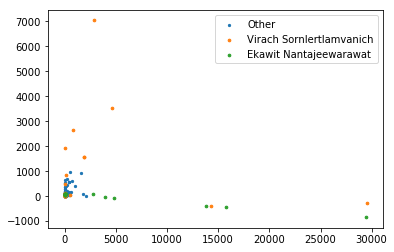

In [101]:
# get the indices where data is 1
def focus_professor(names):
    
    isnOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: x not in names)]
    x,y = isnOwner.T
    plt.scatter(x,y,s=5,label='Other')

    for name in names:
        isOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: name in x)]
        x,y = isOwner.T
        plt.scatter(x,y,s=7,label=name)
    plt.legend()
    plt.show()
focus_professor(['Virach Sornlertlamvanich','Ekawit Nantajeewarawat'])

In [104]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_data_features)
distances, indices = nbrs.kneighbors(train_data_features)

In [107]:
indices

array([[  0,  14],
       [  1,   0],
       [  2,   3],
       [  3,  16],
       [  4,   3],
       [  5, 380],
       [  6,  20],
       [  7,  19],
       [  8,   3],
       [  9,  13],
       [ 10,   0],
       [ 11,  14],
       [ 12,   1],
       [ 13,   9],
       [ 14,  11],
       [ 15, 134],
       [ 16,  22],
       [ 17,   6],
       [ 18,   5],
       [ 19,  14],
       [ 20,   5],
       [ 21,   5],
       [ 22,  16],
       [ 23,  41],
       [ 24,  41],
       [ 25,  29],
       [ 26,  45],
       [ 27,  77],
       [ 28,  43],
       [ 29, 380],
       [ 30,  50],
       [ 31, 357],
       [ 32,  48],
       [ 33,  46],
       [ 34, 370],
       [ 35,  31],
       [ 36,  41],
       [ 37, 311],
       [ 38,  48],
       [ 39, 407],
       [ 40,  42],
       [ 41,  36],
       [ 42,  31],
       [ 43,  49],
       [ 44, 443],
       [ 45,  23],
       [ 46,  31],
       [ 47,  31],
       [ 48,  42],
       [ 49,  46],
       [ 50,  30],
       [ 51,  35],
       [ 52,

In [123]:
cleaned_papers_pdf.iloc[[251,323]] #This were the same paper XD. But just from difference professor.
#Maybe we will can find duplication from 2-KNN

,name,content,directory,isValid,cleaned_content
260,Pakinee Aimmanee,An Overview of Evolutionary Algorithms \nfor P...,./papers/Pakinee Aimmanee/574446b108aea45ee84e...,True,overview evolutionary algorithm parameter opti...
334,THANARUK THEERAMUNKONG,2012 Seventh International Conference on Knowl...,./papers/THANARUK THEERAMUNKONG/Empirical-Sama...,True,seventh international conference knowledge inf...


In [124]:
cleaned_papers_pdf.iloc[[268,269]]

,name,content,directory,isValid,cleaned_content
279,Stanislav S. Makhanov,"Volume 21 (2), pp. 125–138\n\nhttp://www.orssa...",./papers/Stanislav S. Makhanov/34255-17299-1-P...,True,volume pp http www orssa org za orion issn cid...
280,Stanislav S. Makhanov,Pattern Recognition Letters 28 (2007) 1492–150...,./papers/Stanislav S. Makhanov/5.%20A%20filter...,True,pattern recognition letter www elsevier com lo...


In [128]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_data_features)
distances, indices = nbrs.kneighbors(train_data_features)

In [132]:
indices

array([[  0,  14, 342, 357, 401],
       [  1,   0,  14,  16,  22],
       [  2,   3,  22,  16,   5],
       ..., 
       [442, 416, 434, 415, 440],
       [443, 439, 370, 203, 116],
       [444, 311, 372, 357, 342]], dtype=int64)

In [150]:
cleaned_papers_pdf.iloc[indices[0]]

,name,content,directory,isValid,cleaned_content,link
0,Banlue Srisuchinwong,"Thammasat \n\nInt. J. Sc. Tech., Vol.6, No.l, ...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...,<IPython.core.display.HTML object>
16,Banlue Srisuchinwong,International Journal of Electronics Communica...,./papers/Banlue Srisuchinwong/e15baf22b6e34b4e...,True,international journal electronics communicatio...,<IPython.core.display.HTML object>
353,THANARUK THEERAMUNKONG,T\no\nw\na\nr\nd\ns\n \nA\nu\nt\no\nm\na\nt\ni...,./papers/THANARUK THEERAMUNKONG/W96-0114.pdf,True,u u u u u u u u u u u u u u u u u u u u u u u ...,<IPython.core.display.HTML object>
368,Toshiaki Kondo,E\nl\ne\nc\nt\nr\no\nn\n \nM\ni\nc\nr\no\ns\nc...,./papers/Toshiaki Kondo/_pdf,True,u u u u u u u u u u u u u u u u u u u u u u u ...,<IPython.core.display.HTML object>
412,Virach Sornlertlamvanich,T\nh\ne\n \nS\nt\na\nt\ne\n \no\nf\n \nt\nh\ne...,./papers/Virach Sornlertlamvanich/P00-1078,True,u u u u u u u u u u u u u u u u u u u u u u u ...,<IPython.core.display.HTML object>


In [157]:
#Doing Cluster to 5 group.
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_data_features)

In [158]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [159]:
cleaned_papers_pdf['cluster'] = kmeans.labels_

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


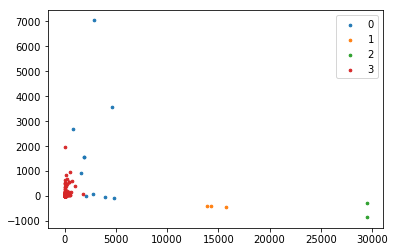

In [162]:
# get the indices where data is 1
def PCA_scatter_plot(seperator='cluster'):
    labels = set(cleaned_papers_pdf[seperator])
    for label in labels:
        isIncluded = reduced_X[cleaned_papers_pdf[seperator].apply(lambda x: x==label)]
        x,y = isIncluded.T
        plt.scatter(x,y,s=7,label=label)
    plt.legend()
    plt.show()
PCA_scatter_plot()

In [164]:
cleaned_papers_pdf[cleaned_papers_pdf['cluster']==0]

,name,content,directory,isValid,cleaned_content,link,cluster
171,Ekawit Nantajeewarawat,Formalization of the Equivalent Transformation...,./papers/Ekawit Nantajeewarawat/0605.pdf,True,formalization equivalent transformation comput...,<IPython.core.display.HTML object>,0
180,Ekawit Nantajeewarawat,", , 1–18 ()\nc(cid:176) Kluwer Academic Publis...",./papers/Ekawit Nantajeewarawat/A_Data_Model_f...,True,cid kluwer academic publisher boston manufactu...,<IPython.core.display.HTML object>,0
181,Ekawit Nantajeewarawat,QUERY FORMULATION AND EVALUATION\nFOR XML DATA...,./papers/Ekawit Nantajeewarawat/f764a79f5f7c5e...,True,query formulation evaluation xml database kiyo...,<IPython.core.display.HTML object>,0
230,Nirattaya Khamsemanan,Hindawi Publishing Corporation\nFixed Point Th...,./papers/Nirattaya Khamsemanan/531037.pdf,True,hindawi publishing corporation fixed point the...,<IPython.core.display.HTML object>,0
338,THANARUK THEERAMUNKONG,Lecture Notes in Computer Science\nCommenced P...,./papers/THANARUK THEERAMUNKONG/Intelligence_a...,True,lecture note computer science commenced public...,<IPython.core.display.HTML object>,0
371,Virach Sornlertlamvanich,COLINGCOLING••ACL 2006ACL 200621st Internation...,./papers/Virach Sornlertlamvanich/10.1.1.360.7...,True,colingcoling acl acl st international conferen...,<IPython.core.display.HTML object>,0
420,Virach Sornlertlamvanich,ACL-IJCNLP2009ALR-77thWorkshoponAsianLanguageR...,./papers/Virach Sornlertlamvanich/Virach Sornl...,True,acl ijcnlp alr thworkshoponasianlanguageresour...,<IPython.core.display.HTML object>,0
423,Virach Sornlertlamvanich,Universal Networking Language: \nAdvances in T...,./papers/Virach Sornlertlamvanich/Virach Sornl...,True,universal networking language advance theory a...,<IPython.core.display.HTML object>,0
424,Virach Sornlertlamvanich,\n \n \n\n \n \n \n \n\nIJCNLP 2008 \n\nThird...,./papers/Virach Sornlertlamvanich/Virach Sornl...,True,ijcnlp third international joint conference na...,<IPython.core.display.HTML object>,0
425,Virach Sornlertlamvanich,ACL-IJCNLP2009ALR-77thWorkshoponAsianLanguageR...,./papers/Virach Sornlertlamvanich/Virach Sornl...,True,acl ijcnlp alr thworkshoponasianlanguageresour...,<IPython.core.display.HTML object>,0
